# 🌐 Segmentación de Clientes con DBSCAN y Árboles de Decisión

En este notebook se exploran técnicas de **clustering con DBSCAN** y un análisis posterior con **árboles de decisión** para interpretar los grupos.

---

## 🚀 Pasos principales

### 1. Carga y exploración de datos
- Se importa el dataset de clientes.  
- Se realiza un análisis exploratorio inicial para conocer las variables.

### 2. Preprocesamiento
- Normalización de variables numéricas.  
- Eliminación de columnas irrelevantes.

### 3. Clustering con DBSCAN
- **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) identifica clústeres en función de la densidad de puntos.  
- Parámetros clave:
  - `eps`: radio máximo de vecindad.  
  - `min_samples`: número mínimo de puntos para formar un clúster.  
- Característica: detecta **ruido y outliers** sin necesidad de fijar `K`.

### 4. Visualización de resultados
- Gráficos de dispersión mostrando clústeres y puntos ruidosos.  
- Comparación frente a otros métodos de clustering.

### 5. Interpretación con Árboles de Decisión
- Se utiliza un **árbol de decisión** entrenado con las etiquetas de DBSCAN.  
- Objetivo: entender qué variables explican mejor la segmentación.  
- Se visualiza el árbol para identificar reglas de clasificación.

---

## 📊 Conclusiones
- **DBSCAN** permite detectar clústeres de distinta forma y tamaño, además de identificar outliers.  
- Los **árboles de decisión** ayudan a **interpretar** cómo se forman los grupos, aportando reglas claras para explicar cada clúster.  
- Esta combinación resulta útil para entender patrones complejos en los clientes.


In [1]:
# IDEA ORIGINAL DEL EJEMPLO: http://exponentis.es/ejemplo-de-uso-de-dbscan-en-python-para-deteccion-de-outliers
# https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# Carga de librerías.
import pandas as pd
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import io
import requests
import warnings

warnings.filterwarnings('ignore')

In [2]:
url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-en-espacios-verdes/arbolado-en-espacios-verdes.csv'
arb = requests.get(url).content
data_arbolado_parques = pd.read_csv(io.StringIO(arb.decode('utf-8')))

data_arbolado_parques

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51497,-58.505752,-34.562998,51725,15,30,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,96104.125550,107350.962385
51498,-58.507111,-34.565843,51726,13,31,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,95979.513368,107035.237268
51499,-58.475721,-34.565192,51727,11,28,0,17,Árbol del cielo (Ailanto o Árbol de los dioses),Ailanthus altissima,Árbol Latifoliado Caducifolio,"CAMPELO, LICENCIADO CARLOS",ESTACIÓN COGHLAN - Propiedad particular e/UGAR...,Simarrubáceas,Ailanthus,Exótico,98860.090864,107108.347622
51500,-58.507026,-34.565670,51728,5,32,0,342,Ciprés,Cupressus sp.,Árbol Conífero Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Cupresáceas,Cupressus,Exótico,95987.288841,107054.471332


In [3]:
data_arbolado_parques.shape

(51502, 17)

In [4]:
data_arbolado_parques.columns

Index(['long', 'lat', 'id_arbol', 'altura_tot', 'diametro', 'inclinacio',
       'id_especie', 'nombre_com', 'nombre_cie', 'tipo_folla', 'espacio_ve',
       'ubicacion', 'nombre_fam', 'nombre_gen', 'origen', 'coord_x',
       'coord_y'],
      dtype='object')

In [5]:
# columnas que me interesan
col_interes = ['diametro', 'altura_tot', 'nombre_com']
nombres_interes = ['Jacarandá', 'Palo borracho rosado', 'Eucalipto', 'Ceibo']

# preparo los dataframe
# selecciono x columnas
data_diametro_altura = data_arbolado_parques[col_interes].copy()
# cambio nombre a 'altura'
data_diametro_altura.rename(columns={'altura_tot': 'altura'}, inplace=True)
#filtrado por especie
diametro_altura_especies = data_diametro_altura[data_diametro_altura['nombre_com'].isin(
    nombres_interes)]
# me quedo con los eucaliptus
euca = diametro_altura_especies[diametro_altura_especies['nombre_com'] == 'Eucalipto']
euca.reset_index(inplace=True)
euca.drop(['nombre_com', 'index'], axis=1, inplace=True)
print(euca.shape)
euca    # (4112, 2)

(4112, 2)


,diametro,altura
0,40,20
1,40,20
2,40,20
3,40,20
4,40,20
...,...,...
4107,74,23
4108,40,7
4109,70,20
4110,40,10


In [6]:
type(euca)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Eucaliptus: Altura vs. Diámetro')

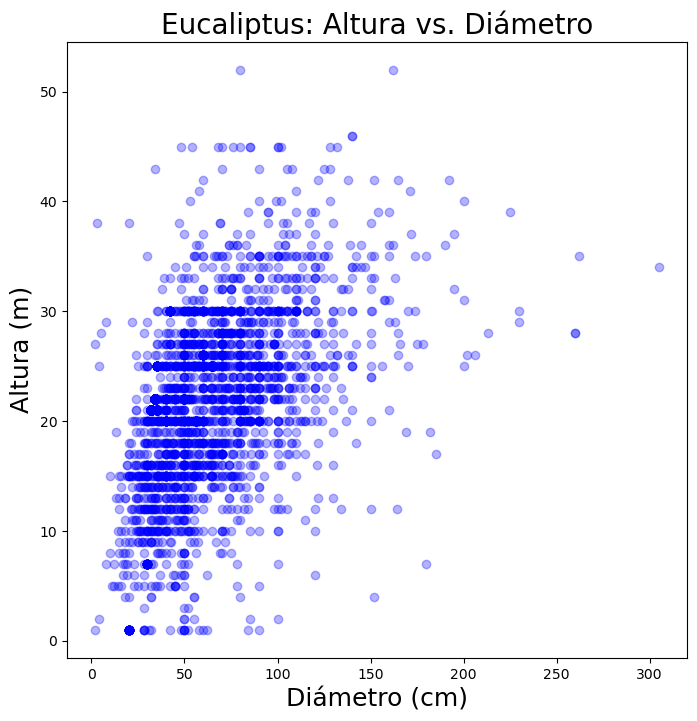

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(euca['diametro'], euca['altura'], 'bo', alpha=0.3)
plt.xlabel('Diámetro (cm)', size=18)
plt.ylabel('Altura (m)', size=18)
plt.title('Eucaliptus: Altura vs. Diámetro', size=20)

In [8]:
euca.describe().T

,count,mean,std,min,25%,50%,75%,max
diametro,4112.0,54.362354,30.043462,2.0,32.0,43.0,68.0,305.0
altura,4112.0,21.647617,6.489263,1.0,20.0,21.0,25.0,52.0


# 🔄 Normalización de Datos con MinMaxScaler

En este bloque se aplica **Min-Max Scaling** para llevar las variables a un rango común y evitar que las diferencias de escala afecten a los algoritmos de clustering.

---

## 📘 ¿Qué hace MinMaxScaler?
- Transforma los valores de cada columna a un rango entre **0 y 1** (por defecto).  
- Fórmula:  

\[
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\]

In [9]:
# Se normalizan los datos con MinMax()
# 📘 ¿Qué hace MinMaxScaler?
# La normalización Min-Max lleva todos los valores de una columna a un rango entre 0 y 1 (por defecto).
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(euca)
euscalado = pd.DataFrame(df_escalado)
euscalado = euscalado.rename(columns = {0: 'diametro', 1: 'altura'})
print(type(df_escalado))
euscalado
# new_df['diametro']=(euca['diametro']-euca['diametro'].min())/(euca['diametro'].max()-euca['diametro'].min())

<class 'numpy.ndarray'>


,diametro,altura
0,0.125413,0.372549
1,0.125413,0.372549
2,0.125413,0.372549
3,0.125413,0.372549
4,0.125413,0.372549
...,...,...
4107,0.237624,0.431373
4108,0.125413,0.117647
4109,0.224422,0.372549
4110,0.125413,0.176471


In [10]:
df_escalado

array([[0.12541254, 0.37254902],
       [0.12541254, 0.37254902],
       [0.12541254, 0.37254902],
       ...,
       [0.22442244, 0.37254902],
       [0.12541254, 0.17647059],
       [0.32343234, 0.35294118]])

# 🌀 Clustering con DBSCAN

En este bloque se aplica el algoritmo **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise)  
para identificar clústeres de clientes en función de la densidad de los datos.

---

## ⚙️ Configuración del modelo
- **eps = 0.02** → radio de vecindad. Define la distancia máxima para considerar dos puntos como “vecinos”.  
- **min_samples = 5** → número mínimo de puntos necesarios en la vecindad para formar un clúster.  
- **metric = "euclidean"** → se utiliza la distancia euclídea como métrica de similitud.  

Text(0, 0.5, 'Altura (m)')

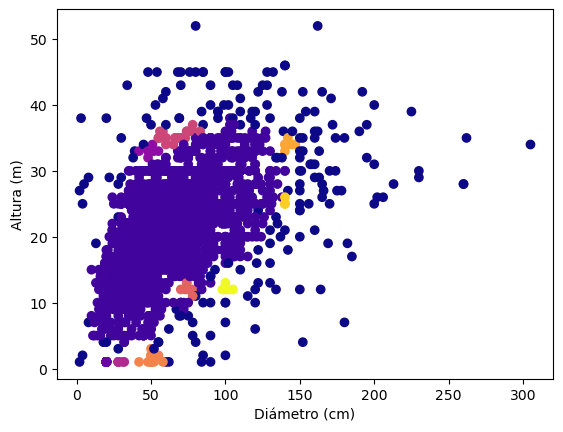

In [11]:
# Ejecutamos DBSCAN → algoritmo de clustering basado en densidad.
# eps=0.02 → radio de vecindad: define qué tan cerca deben estar los puntos para considerarse “vecinos”.
dbscan = DBSCAN(eps=0.02, min_samples = 5, metric = "euclidean").fit(euscalado) # eps=0.025, min_samples=5
clusters = dbscan.fit_predict(euscalado)
df_values = euca.values
# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Diámetro (cm)")
plt.ylabel("Altura (m)")

# 📘 ¿Por qué necesitamos esto?

En **DBSCAN** hay dos hiperparámetros críticos que definen cómo se forman los clústeres:

- **`eps`** → radio de vecindad (distancia máxima entre puntos para ser considerados vecinos).  
- **`min_samples` o `minPts`** → número mínimo de vecinos para que un punto sea considerado **núcleo**.  

👉 El valor de **`eps`** es el más difícil de elegir.  
El truco consiste en observar las **distancias al k-ésimo vecino más cercano** de todos los puntos.  
Al ordenarlas y graficarlas, se forma una curva donde aparece un **codo (el "knee")**, que indica un buen valor para `eps`.

---

## ⚙️ Parametrización de DBSCAN

1. **Reducción de dimensionalidad con PCA**  
   Se reducen los datos a **2 dimensiones** para simplificar el análisis de distancias y la visualización.

2. **Cálculo de distancias**  
   Se calculan todas las distancias euclídeas entre los puntos en el espacio reducido.

3. **Gráfico de distancias ordenadas**  
   Permite detectar visualmente el valor de `eps` adecuado.

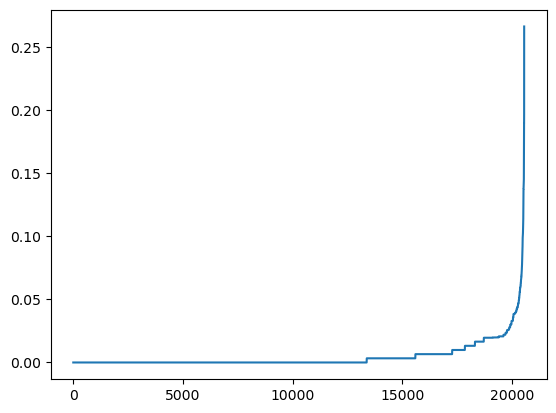

In [12]:
# 📘 ¿Por qué necesitamos esto?

# En DBSCAN hay dos hiperparámetros críticos:
# eps (radio de vecindad).
# min_samples o minPts (mínimo de vecinos para ser un punto núcleo).
# Elegir eps es lo más difícil.
# El truco es mirar las distancias al k-ésimo vecino más cercano para todos los puntos.
# Cuando ordenás esas distancias y las graficás → se forma una curva donde aparece un codo (el "knee") que indica un buen valor de eps.


## Parametrización de DBSCAN.

# Reduce tus datos a 2 dimensiones con PCA.
# Esto simplifica el análisis de distancias y visualización.
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(euscalado)

dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)

# Calcula todas las distancias euclídeas entre los puntos en el espacio reducido.
minPts  = 5 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()

Text(0, 0.5, 'Altura (m)')

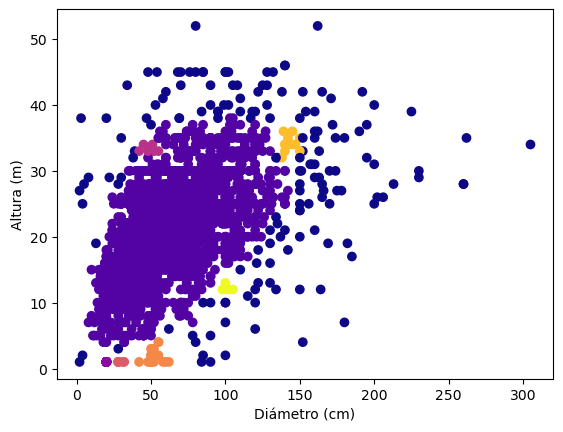

In [13]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.0235, min_samples = 5, metric = "euclidean").fit(euscalado)
clusters = dbscan.fit_predict(euscalado)
df_values = euca.values
# Graficación de los clústers.
plt.scatter(df_values[:, 0], df_values[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Diámetro (cm)")
plt.ylabel("Altura (m)")

In [14]:
print(clusters.shape)
clusters

(4112,)


array([0, 0, 0, ..., 0, 0, 0])

In [15]:
import numpy as np
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [16]:
# Vemos cada uno de los clusters cuántos valores tiene.
copy = pd.DataFrame()
copy['altura']=euca['altura'].values
copy['diametro']=euca['diametro'].values
copy['label'] = clusters;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo     # con label=-1 DBSCAN etiqueta los outliers

,cantidad
label,
-1,159
0,3875
1,31
2,7
3,6
4,17
5,12
6,5


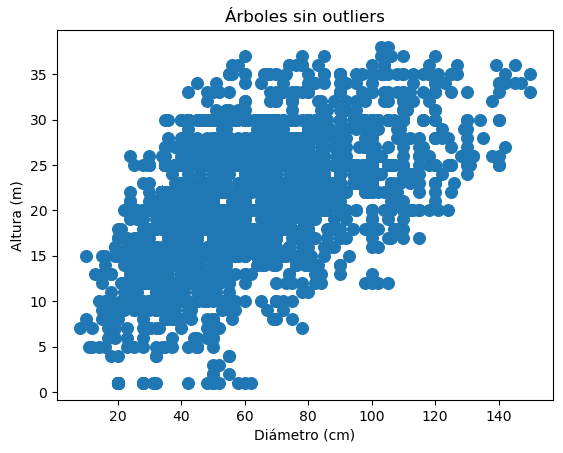

In [17]:
# Eliminamos los puntos marcados como outliers y representamos gráficamente.
copy = copy.drop(copy[copy['label'] == -1].index)

# Gráfica del dataframe "limpio"
f1 = copy['diametro'].values
f2 = copy['altura'].values

plt.scatter(f1, f2, s=70)

plt.xlabel("Diámetro (cm)")
plt.ylabel("Altura (m)")
plt.title("Árboles sin outliers")
plt.show()

In [18]:
# https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/
# https://www.geeksforgeeks.org/dbms/difference-between-k-means-and-dbscan-clustering/